# DEEP Learning with Tensorflow

#### Install required packages

In [1]:
%pip install --upgrade scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


## Explore the dataset

In [2]:
# Load the dataset
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('./../../data/penguins.csv').dropna()

print(penguins.size)

1710


In [3]:
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [4]:
# Data Normalization
penguins['FlipperLength'] = penguins['FlipperLength'] / 10
penguins['BodyMass'] = penguins['BodyMass'] / 100

In [5]:
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,18.1,37.5,0
1,39.5,17.4,18.6,38.0,0
2,40.3,18.0,19.5,32.5,0
4,36.7,19.3,19.3,34.5,0
5,39.3,20.6,19.0,36.5,0


# Handle Dataset Size

Dataset is too small for useful deep learning. Increase dataset size with **oversamling**.

In [6]:
print(penguins.size)

# Oversampling
for i in range(3):
    penguins = pd.concat([penguins, penguins], ignore_index=True)

print(penguins.size)

1710
13680


In [7]:
# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
2068,42.5,20.7,19.7,45.00,0
659,45.5,17.0,19.6,35.00,2
1057,39.5,17.8,18.8,33.00,0
2709,46.2,17.5,18.7,36.50,2
2547,48.7,14.1,21.0,44.50,1
1001,45.5,17.0,19.6,35.00,2
816,37.5,18.5,19.9,44.75,0
191,42.7,13.7,20.8,39.50,1
2,40.3,18.0,19.5,32.50,0
1319,49.2,18.2,19.5,44.00,2


In [8]:
# Target - species value
penguins['Species'].unique()

array([0, 1, 2])

In [9]:
penguins['Species'].unique()

array([0, 1, 2])

In [10]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

print(sample.columns[0:5].values, 'SpeciesName')

for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 48.4 14.4 20.3 46.25 1 ] Gentoo
[ 49.3 19.9 20.3 40.5 2 ] Chinstrap
[ 50.8 19.0 21.0 41.0 2 ] Chinstrap
[ 53.5 19.9 20.5 45.0 2 ] Chinstrap
[ 36.3 19.5 19.0 38.0 0 ] Adelie
[ 34.6 21.1 19.8 44.0 0 ] Adelie
[ 38.1 16.5 19.8 38.25 0 ] Adelie
[ 51.3 14.2 21.8 53.0 1 ] Gentoo
[ 40.3 18.5 19.6 43.5 0 ] Adelie
[ 46.9 16.6 19.2 27.0 2 ] Chinstrap


/tmp/ipykernel_9871/4059054900.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])


In [11]:
penguins['Species'].unique()

array([0, 1, 2])

## Split the dataset

In [12]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 1915, Test Set: 821 

Sample of features and labels:
[42.5 20.7 19.7 45. ] 0 (Adelie)
[45.6 20.3 19.1 46. ] 0 (Adelie)
[42.6 13.7 21.3 49.5] 1 (Gentoo)
[40.3 18.5 19.6 43.5] 0 (Adelie)
[39.7 17.7 19.3 32. ] 0 (Adelie)
[46.4 17.8 19.1 37. ] 2 (Chinstrap)
[38.8 20.  19.  39.5] 0 (Adelie)
[48.8 16.2 22.2 60. ] 1 (Gentoo)
[46.2 17.5 18.7 36.5] 2 (Chinstrap)
[59.6 17.  23.  60.5] 1 (Gentoo)
[41.5 18.5 20.1 40. ] 0 (Adelie)
[39.5 16.7 17.8 32.5] 0 (Adelie)
[50.5 15.9 22.5 54. ] 1 (Gentoo)
[45.6  19.4  19.4  35.25] 2 (Chinstrap)
[37.9  18.6  19.3  29.25] 0 (Adelie)
[51.1 16.3 22.  60. ] 1 (Gentoo)
[52.8 20.  20.5 45.5] 2 (Chinstrap)
[39.6 17.2 19.6 35.5] 0 (Adelie)
[51.1 16.3 22.  60. ] 1 (Gentoo)
[36.7 18.8 18.7 38. ] 0 (Adelie)
[49.1 15.  22.8 55. ] 1 (Gentoo)
[37.6 19.1 19.4 37.5] 0 (Adelie)
[36.  17.8 19.5 34.5] 0 (Adelie)
[39.1 18.7 18.1 37.5] 0 (Adelie)


## Install and import tensorflow

In [13]:
%pip install --no-cache-dir tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducibility
tf.random.set_seed(0)

import importlib.metadata

print("Libraries imported.")

2025-05-31 10:56:49.562567: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 10:56:49.878640: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 10:56:50.076193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748667410.448152    9871 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748667410.527020    9871 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748667411.085825    9871 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Libraries imported.


In [15]:
# Check tesnsorflow && keras version
print('TensorFlow version:', tf.__version__)

try:
    keras_version = importlib.metadata.version("keras")
    print('Keras version:', keras_version)
except importlib.metadata.PackageNotFoundError:
    print("Keras is not installed separately, using TensorFlow's built-in Keras.")

TensorFlow version: 2.19.0
Keras version: 3.10.0


In [16]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


## Create a neural network

In [17]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())

/home/fahad/projects/personal/mlops/ml_fundamentals/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-31 10:59:08.416262: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
# Optimize the hyper parameter

learning_rate = 0.001
opt = optimizers.Adam(learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model)

<Sequential name=sequential, built=True>


In [22]:
# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50

history = model.fit(x_train, y_train, 
                    epochs=num_epochs, 
                    batch_size=10, 
                    validation_data=(x_test, y_test)
                    )

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2954 - loss: 8.4369 - val_accuracy: 0.3130 - val_loss: 1.8108
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1373 - loss: 1.5224 - val_accuracy: 0.3520 - val_loss: 1.3591
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3438 - loss: 1.0706 - val_accuracy: 0.5140 - val_loss: 0.8126
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7290 - loss: 0.6289 - val_accuracy: 0.7320 - val_loss: 0.5348
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8505 - loss: 0.4378 - val_accuracy: 0.7978 - val_loss: 0.3883
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9160 - loss: 0.3289 - val_accuracy: 0.9135 - val_loss: 0.2799
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9615 - loss: 0.2426 - val_accuracy: 0.9720 - val_loss: 0.2048
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9789 - loss: 0.1782 - val_accuracy:

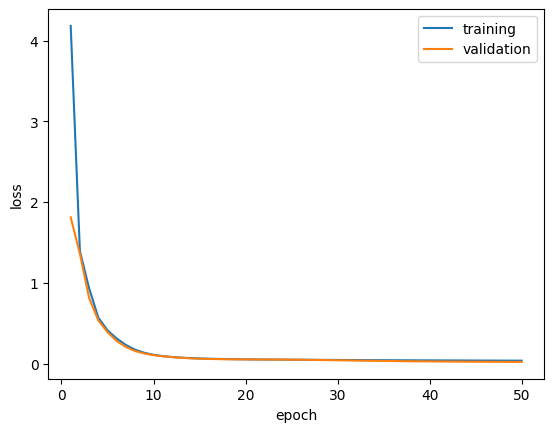

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [24]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.48902875  0.05852902  0.75246435  0.0668913   0.11360854  0.11332717
  -0.25296286  0.22829962 -0.4356409  -0.05672086]
 [-0.46353364 -0.48925868 -0.5887988  -0.18011424 -0.28762373  0.9319251
   0.34735072 -0.5901801   0.24501032 -0.42042527]
 [-0.3629167   0.37226486 -0.315475   -0.00242275  0.41141045  0.4265978
   0.06777483 -0.24204868 -0.50082576  0.61553514]
 [-0.36768174 -0.516118    0.27874938  0.6451729  -0.4439053   0.14476612
  -0.17650613 -0.21216422 -0.46305382  0.46996194]] 
Biases:
 [ 0.          0.         -0.31981096  0.16321602  0.          0.26857418
  0.          0.          0.         -0.231712  ]
------------
Weights:
 [[ 0.52789485 -0.09959418  0.00639421  0.29004025 -0.47672427 -0.13650623
   0.30863196  0.27731115  0.05588388  0.4428994 ]
 [-0.34081626  0.48033094 -0.27703142  0.18262649 -0.45218575 -0.41358662
  -0.13294682 -0.52707857  0.03526562 -0.20061803]
 [-0.2637162   0.12884907  0.058879    0.24415717  0.19727045  0.1407751

## Evaluate the model

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


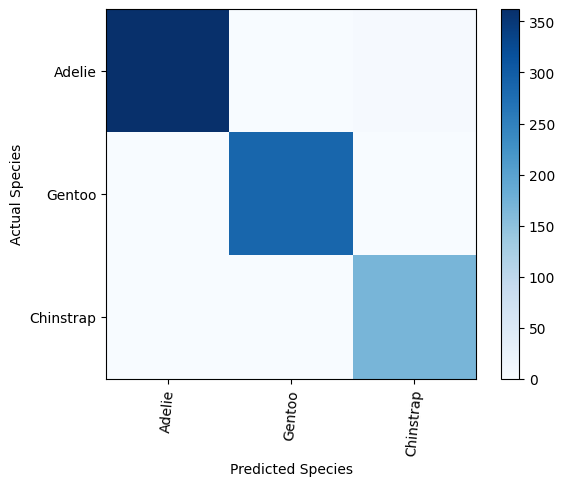

In [25]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [26]:
# Save the trained model
modelFileName = './../models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as ./../models/penguin-classifier.h5


In [27]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Gentoo
